**PACKAGES AND LIBRARIES USED:**

In [1111]:
import numpy as np
import time
import psutil
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from keras.layers import Input
import matplotlib.pyplot as plt

**CODE USED FOR DATA COLLECTION:**  
**THIS CODE WAS RNUED ON OUR COMPUTERS NOT IN COLAB AND THE DATASET FILE "dataset.txt" WAS THE RESULT OF THIS CODE**



1. Small sizes of array varry from 1 to 1000000 (added in order that the model is able to generalize) we have 2000 different sizes ranging among this values .
2. Big sizes of array varry from 1000000 to 10000000 and we have 8000 different sizes .
3. Dataset size in 10000 samples , we have 1 features : array size .
4. We have 2 target features (outputs) : run time and memory usage .


In [ ]:
small_sizes = np.linspace(1,1000000,2000,dtype=int)
large_sizes = np.linspace(1000000,10000000,8000,dtype=int)

all_sizes = np.append(small_sizes , large_sizes)
np.random.shuffle(all_sizes)


#col 0 for size     col 1 for runtime     col2 for memory usage
dataset = np.zeros(shape=(all_sizes.size,3))

def get_memory_usage():
    process_id = os.getpid()
    py = psutil.Process(process_id)
    memory = py.memory_info()[0] / float(2 ** 20)  # memory use in MB
    return memory

for i in range(0,all_sizes.size):
    my_array = np.random.rand(all_sizes[i])
    c = np.zeros(all_sizes[i])
    print(i)
    dataset[i][0] = all_sizes[i]
    start = time.time()
    memory_use_start = get_memory_usage()
    c =  np.log(my_array) + np.exp(my_array) + np.power(my_array,20) + np.multiply(my_array,my_array,c)
    memory_use_stop  = get_memory_usage()
    stop = time.time()
    run_time = stop - start
    memory_use = memory_use_stop - memory_use_start
    dataset[i][1] = run_time
    dataset[i][2] = memory_use


np.savetxt('test.txt', dataset, delimiter=',')

**LOADING DATASET:**


1.   Train Set size: 7000 samples
2.   Cross validation Set size: 1000 samples
3.   Testin Set: 2000 samples



In [ ]:
dataset = np.loadtxt("/content/dataset.txt",delimiter=",")
training_set = dataset[0:7000]
cross_validation_set = dataset[7000:8000]
testing_set = dataset[8000:]

**PLOTING OF FEATURES**

Text(0.5, 1.0, 'Run time feature')

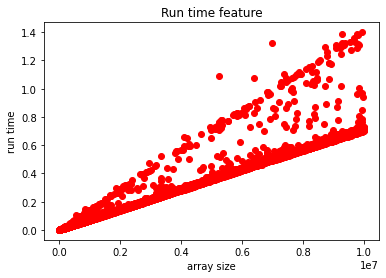

In [1129]:
plt.plot(dataset[:,0],dataset[:,1], 'ro')
plt.xlabel('array size')
plt.ylabel('run time')
plt.title("Run time target feature")

Text(0.5, 1.0, 'Memory usage target feature')

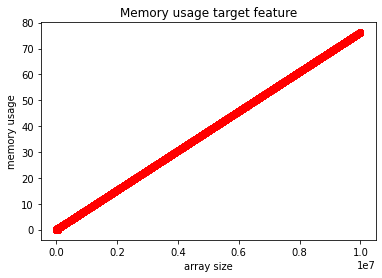

In [1130]:
plt.plot(dataset[:,0],dataset[:,2], 'ro')
plt.xlabel('array size')
plt.ylabel('memory usage')
plt.title("Memory usage target feature")

**As we can see in both figures data can be easly represented using a line, so we already think that we could have good prediction results**

In [1115]:
training_set_X = training_set[:,0]
training_set_X = training_set_X.astype(int)
training_set_Y = training_set[:,1:]

cross_validation_set_X = cross_validation_set[:,0]
cross_validation_set_X = cross_validation_set_X.astype(int)
cross_validation_set_Y = cross_validation_set[:,1:]

testing_set_X = testing_set[:,0]
testing_set_X = testing_set_X.astype(int)
testing_set_Y = testing_set[:,1:]

In [1116]:
training_set_X = np.reshape(training_set_X,newshape=(training_set_X.size,1))

**NEURAL NETWORK MODEL AND ITS ARCHITECTURE**


due to overfiting we used following features and hyperameters:
1.   L2 regualarization
2.   Batch normalization layer
3.   Drop Out layer 



In [1117]:
model = Sequential([
    Dense(16, input_shape=(1,) ,activation='relu',kernel_regularizer='l2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    Dense(2),
])

In [1118]:
model.summary()

Model: "sequential_122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_364 (Dense)            (None, 16)                32        
_________________________________________________________________
batch_normalization_26 (Batc (None, 16)                64        
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_365 (Dense)            (None, 2)                 34        
Total params: 130
Trainable params: 98
Non-trainable params: 32
_________________________________________________________________


In [1119]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

**TRAINING PROCESS:** 5 epochs were used

In [1120]:
hist = model.fit(training_set_X, training_set_Y,
          batch_size=32, epochs=5,
          validation_data=(cross_validation_set_X, cross_validation_set_Y))

Epoch 1/5
219/219 [==============================] - 1s 2ms/step - loss: 811.4881 - accuracy: 0.5703 - val_loss: 785.5667 - val_accuracy: 0.6120
Epoch 2/5
219/219 [==============================] - 0s 1ms/step - loss: 674.7994 - accuracy: 0.6676 - val_loss: 666.7187 - val_accuracy: 0.6930
Epoch 3/5
219/219 [==============================] - 0s 1ms/step - loss: 478.6114 - accuracy: 0.7525 - val_loss: 429.0425 - val_accuracy: 0.7930
Epoch 4/5
219/219 [==============================] - 0s 1ms/step - loss: 278.5420 - accuracy: 0.7830 - val_loss: 304.3702 - val_accuracy: 0.8600
Epoch 5/5
219/219 [==============================] - 0s 1ms/step - loss: 146.1394 - accuracy: 0.8357 - val_loss: 207.2472 - val_accuracy: 0.9780


In [1121]:
print(model.metrics_names)

['loss', 'accuracy']


**ACURACCY WHEN TEST SET IS USED:**

In [1126]:
outputs = model.evaluate(testing_set_X, testing_set_Y)
print(outputs)

63/63 [==============================] - 0s 966us/step - loss: 198.3798 - accuracy: 0.9820
[198.3797607421875, 0.9819999933242798]


**IS THE MODEL OVERFITING:**
the following plot were we ploted cross validation loss function against training loss function shows that overfiting didn't occur 

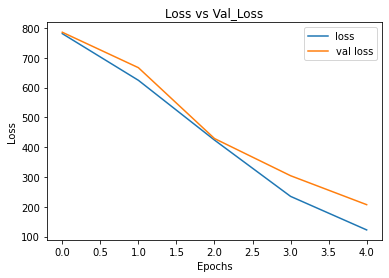

In [1123]:
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title('Loss vs Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Predicting run time and memory usage of a random array size**

In [1136]:
newX = np.array([2000000])
yhat = model.predict(newX)
print(yhat)

[[0.14908302 7.70008   ]]
